In [1]:
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

In [2]:
df=pd.read_excel('clean_complete.xlsx') 
df.head()

Order# Item Number              Brand  \
0  264769028  DH0690-200  Nike Travis Scott   
1  333774300      GX3791      Adidas Yeezy    
2  460571929      GX3791      Adidas Yeezy    
3  304141507  555088-180             Jordan   
4  560071244  555088-603             Jordan   

                                            Item  \
0                           TS AJ6 British Khaki   
1               Yeezy Boost 350 V2 'Mono Cinder'   
2                Yeezy Boost 350 V2 'Mono Cinder   
3  Air Jordan 1 Retro High OG 'Electro Orange'\n   
4                                            白黄粉   

                                Sneaker Name  Size US  Retail Price  \
0  Jordan 6 Retro Travis Scott British Khaki     14.0           250   
1      Adidas Yeezy Boost 350 V2 Mono Cinder     14.0           220   
2      adidas Yeezy Boost 350 V2 Mono Cinder     14.0           220   
3         Jordan 1 Retro High Electro Orange     14.0           170   
4    Jordan 1 Retro High OG Light Fusion Red     14.0           170   

   Purchased Price CNY  Purchased Price USD  Sales Price USD  Profit USD  \
0               2720.0           421.908204           489.99   68.081796   
1               1387.0           214.812291           261.45   46.637709   
2               1345.0           208.692144           277.55   68.857856   
3               1077.0           166.979333           188.86   21.880667   
4               1015.0           157.662556           156.90   -0.762556   

   Currency  
0    6.4469  
1    6.4568  
2    6.4449  
3    6.4499  
4    6.4378

In [3]:
#Dataframe Info

df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7641 entries, 0 to 7640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order#               7641 non-null   int64  
 1   Item Number          7641 non-null   object 
 2   Brand                7641 non-null   object 
 3   Item                 7641 non-null   object 
 4   Sneaker Name         7641 non-null   object 
 5   Size US              7641 non-null   float64
 6   Retail Price         7641 non-null   int64  
 7   Purchased Price CNY  7641 non-null   float64
 8   Purchased Price USD  7641 non-null   float64
 9   Sales Price USD      7641 non-null   float64
 10  Profit USD           7641 non-null   float64
 11  Currency             7641 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 716.5+ KB


Order#                 0
Item Number            0
Brand                  0
Item                   0
Sneaker Name           0
Size US                0
Retail Price           0
Purchased Price CNY    0
Purchased Price USD    0
Sales Price USD        0
Profit USD             0
Currency               0
dtype: int64

In [4]:
# Remove - in sneaker name 
df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-', ' '))
df['Brand'] = df['Brand'].apply(lambda x: x.replace('-', ' '))

In [5]:
#df['Size US'] = pd.to_numeric(df['Size US'],errors = 'coerce')

In [6]:
#Create two additional columns: Time Released, and Profit
df['Retail Profit'] = (df['Sales Price USD'] - df['Retail Price'])   
df.head()

Order# Item Number              Brand  \
0  264769028  DH0690-200  Nike Travis Scott   
1  333774300      GX3791      Adidas Yeezy    
2  460571929      GX3791      Adidas Yeezy    
3  304141507  555088-180             Jordan   
4  560071244  555088-603             Jordan   

                                            Item  \
0                           TS AJ6 British Khaki   
1               Yeezy Boost 350 V2 'Mono Cinder'   
2                Yeezy Boost 350 V2 'Mono Cinder   
3  Air Jordan 1 Retro High OG 'Electro Orange'\n   
4                                            白黄粉   

                                Sneaker Name  Size US  Retail Price  \
0  Jordan 6 Retro Travis Scott British Khaki     14.0           250   
1      Adidas Yeezy Boost 350 V2 Mono Cinder     14.0           220   
2      adidas Yeezy Boost 350 V2 Mono Cinder     14.0           220   
3         Jordan 1 Retro High Electro Orange     14.0           170   
4    Jordan 1 Retro High OG Light Fusion Red     14.0           170   

   Purchased Price CNY  Purchased Price USD  Sales Price USD  Profit USD  \
0               2720.0           421.908204           489.99   68.081796   
1               1387.0           214.812291           261.45   46.637709   
2               1345.0           208.692144           277.55   68.857856   
3               1077.0           166.979333           188.86   21.880667   
4               1015.0           157.662556           156.90   -0.762556   

   Currency  Retail Profit  
0    6.4469         239.99  
1    6.4568          41.45  
2    6.4449          57.55  
3    6.4499          18.86  
4    6.4378         -13.10

In [7]:
df.describe()

Order#      Size US  Retail Price  Purchased Price CNY  \
count  7.641000e+03  7641.000000   7641.000000          7641.000000   
mean   5.524762e+08     7.606596    117.049470          1114.283563   
std    2.577062e+08     1.958099     58.735258           523.666549   
min    1.000077e+08     1.000000     35.000000           380.000000   
25%    3.315310e+08     6.000000     60.000000           774.150000   
50%    5.548875e+08     7.500000    100.000000           976.000000   
75%    7.746535e+08     9.000000    170.000000          1313.000000   
max    9.998133e+08    14.000000    250.000000          6000.000000   

       Purchased Price USD  Sales Price USD   Profit USD     Currency  \
count          7641.000000      7641.000000  7641.000000  7641.000000   
mean            172.716737       188.521687    15.780949     6.453070   
std              81.210961        81.873009    32.223043     0.087987   
min              58.889164        63.970000  -375.096981     4.311824   
25%             120.080969       132.940000     8.751783     6.444800   
50%             151.604585       164.620000    15.622145     6.451800   
75%             203.461795       216.920000    25.387081     6.463800   
max             930.246981       658.750000   299.160428     9.898306   

       Retail Profit  
count    7641.000000  
mean       71.472217  
std        74.576668  
min      -104.680000  
25%        12.940000  
50%        70.230000  
75%       119.480000  
max       558.750000

In [8]:
#Correlation 
#corr = df.corr(method = 'kendall')
#corr

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Drop features 
df.drop('Order#', axis=1, inplace=True)
df.corr()

Size US  Retail Price  Purchased Price CNY  \
Size US              1.000000      0.182484             0.164159   
Retail Price         0.182484      1.000000             0.453801   
Purchased Price CNY  0.164159      0.453801             1.000000   
Purchased Price USD  0.163734      0.453709             0.999692   
Sales Price USD      0.247374      0.477386             0.921946   
Profit USD           0.216491      0.068937            -0.177189   
Currency            -0.000059     -0.012612            -0.015655   
Retail Profit        0.127856     -0.263490             0.654741   

                     Purchased Price USD  Sales Price USD  Profit USD  \
Size US                         0.163734         0.247374    0.216491   
Retail Price                    0.453709         0.477386    0.068937   
Purchased Price CNY             0.999692         0.921946   -0.177189   
Purchased Price USD             1.000000         0.921678   -0.178644   
Sales Price USD                 0.921678         1.000000    0.216231   
Profit USD                     -0.178644         0.216231    1.000000   
Currency                       -0.037729        -0.015815    0.054815   
Retail Profit                   0.654518         0.721856    0.183093   

                     Currency  Retail Profit  
Size US             -0.000059       0.127856  
Retail Price        -0.012612      -0.263490  
Purchased Price CNY -0.015655       0.654741  
Purchased Price USD -0.037729       0.654518  
Sales Price USD     -0.015815       0.721856  
Profit USD           0.054815       0.183093  
Currency             1.000000      -0.007429  
Retail Profit       -0.007429       1.000000

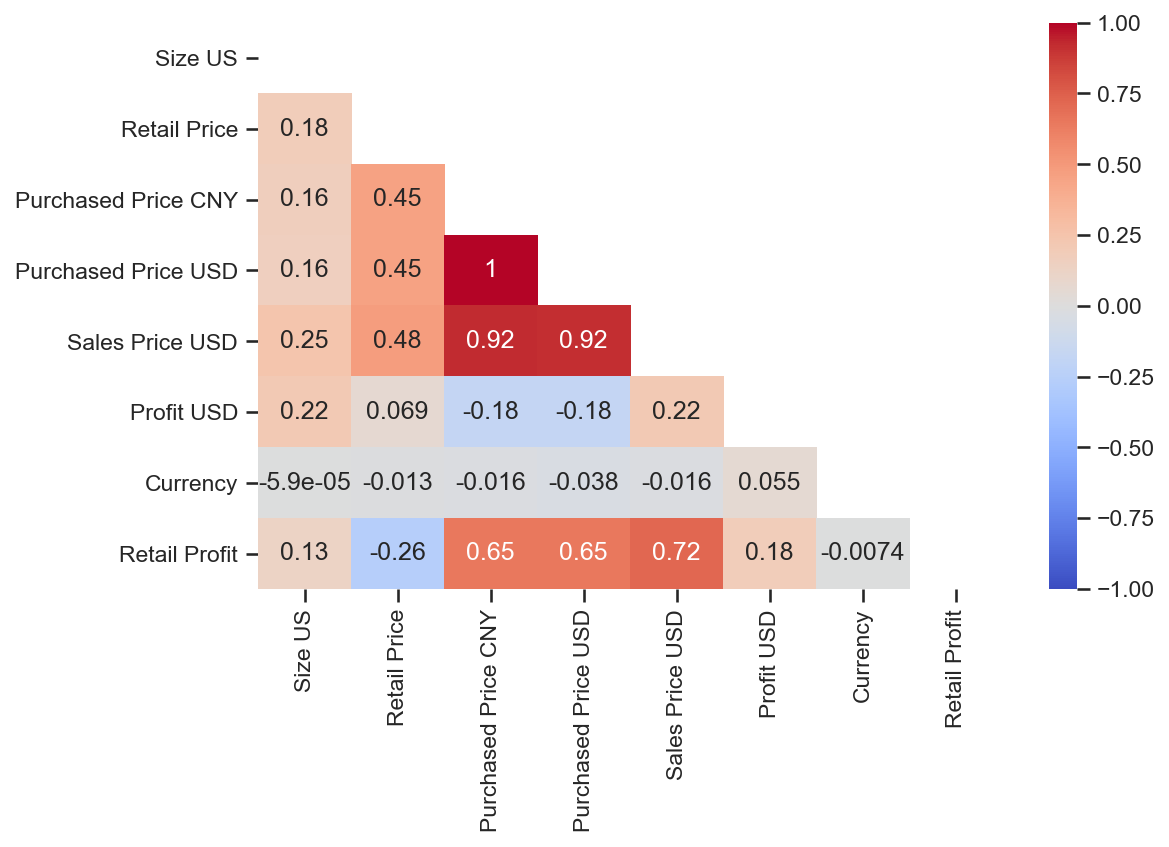

In [9]:
# show heat map of the correlation
upp_mat = np.triu(df.corr())
sns.heatmap(df.corr(), vmin=-1,vmax=+1, annot=True, cmap='coolwarm', mask = upp_mat)
plt.show()

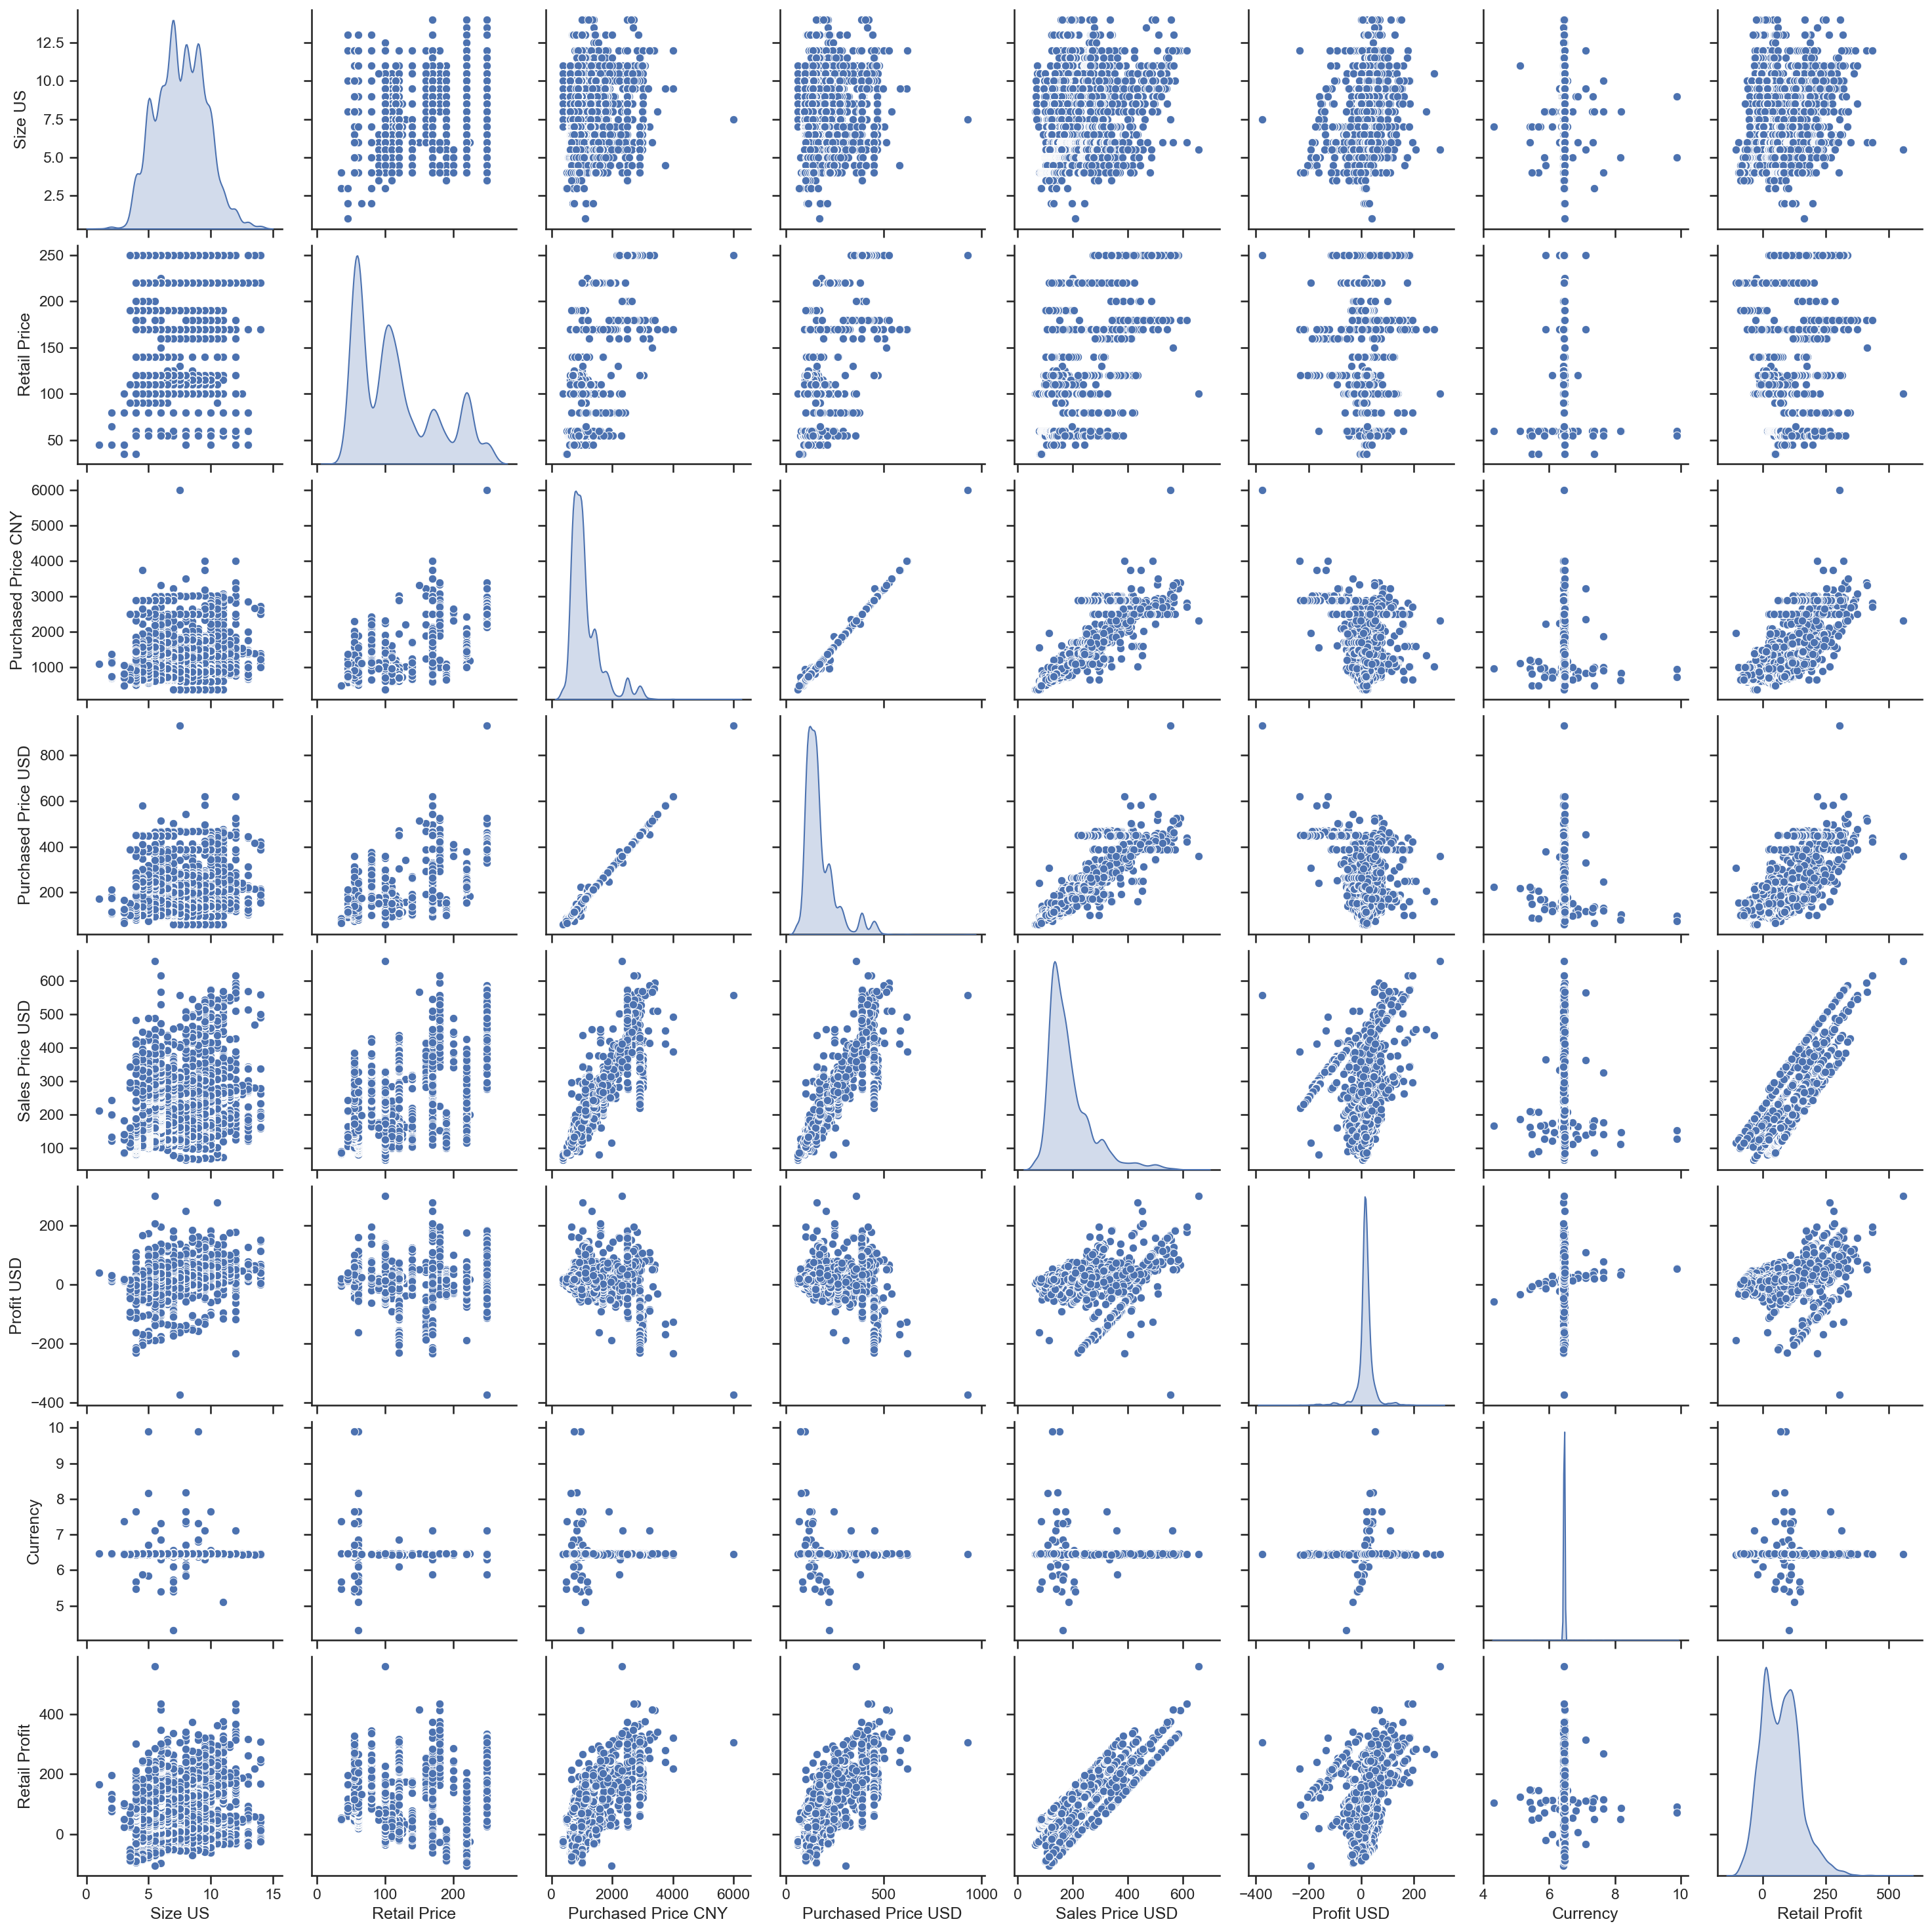

In [10]:
#All variables
sns.pairplot(df,diag_kind='kde')

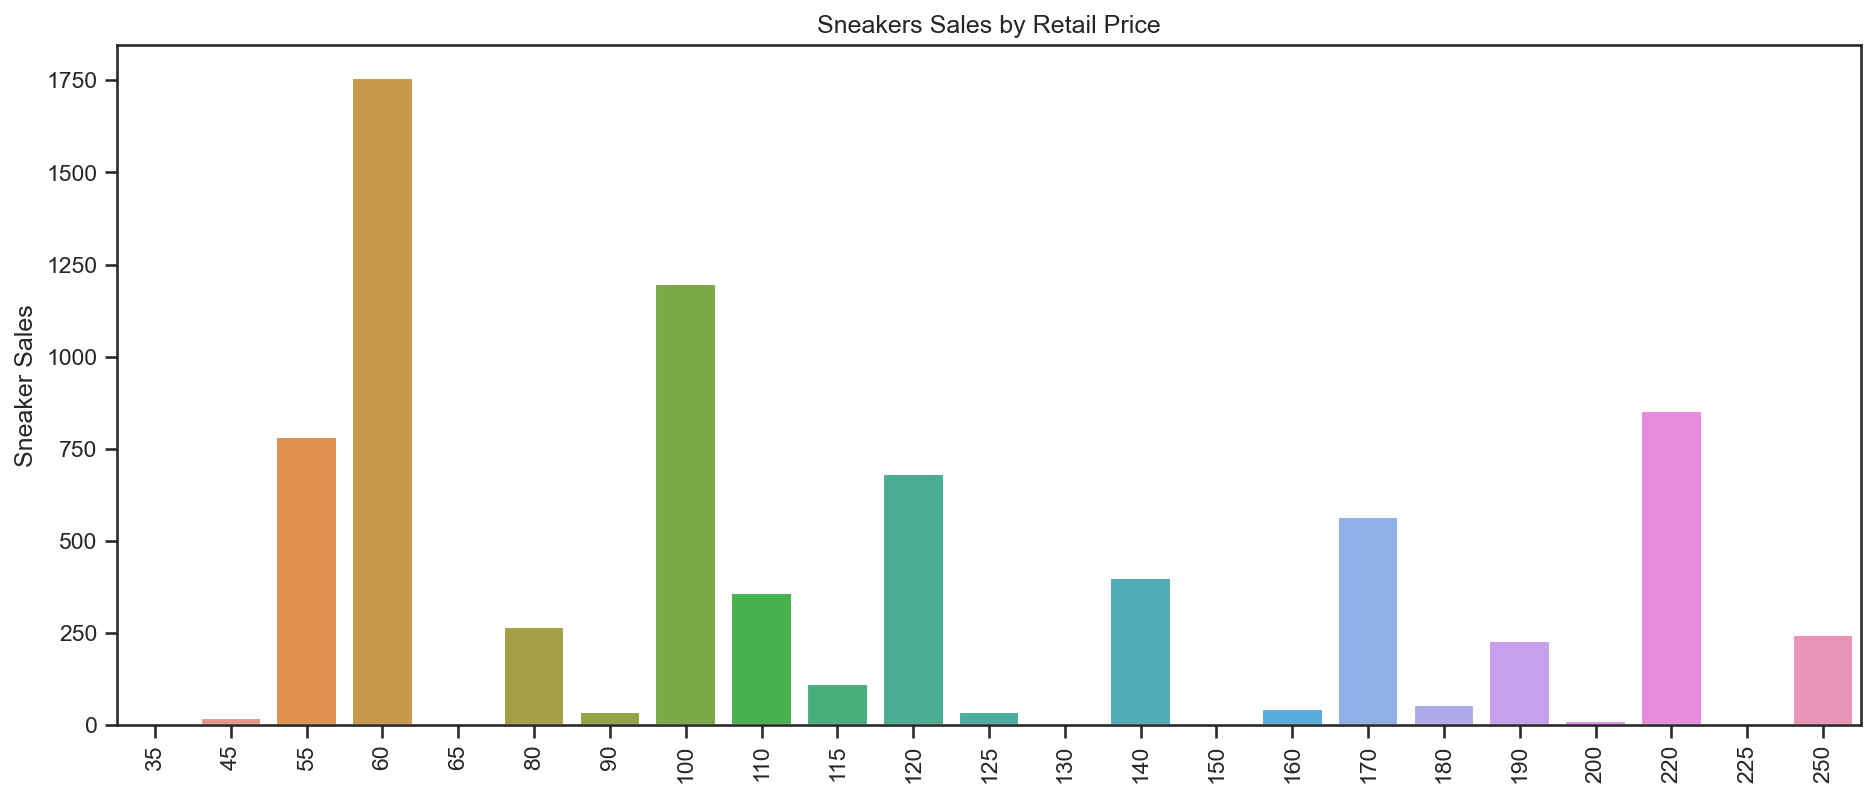

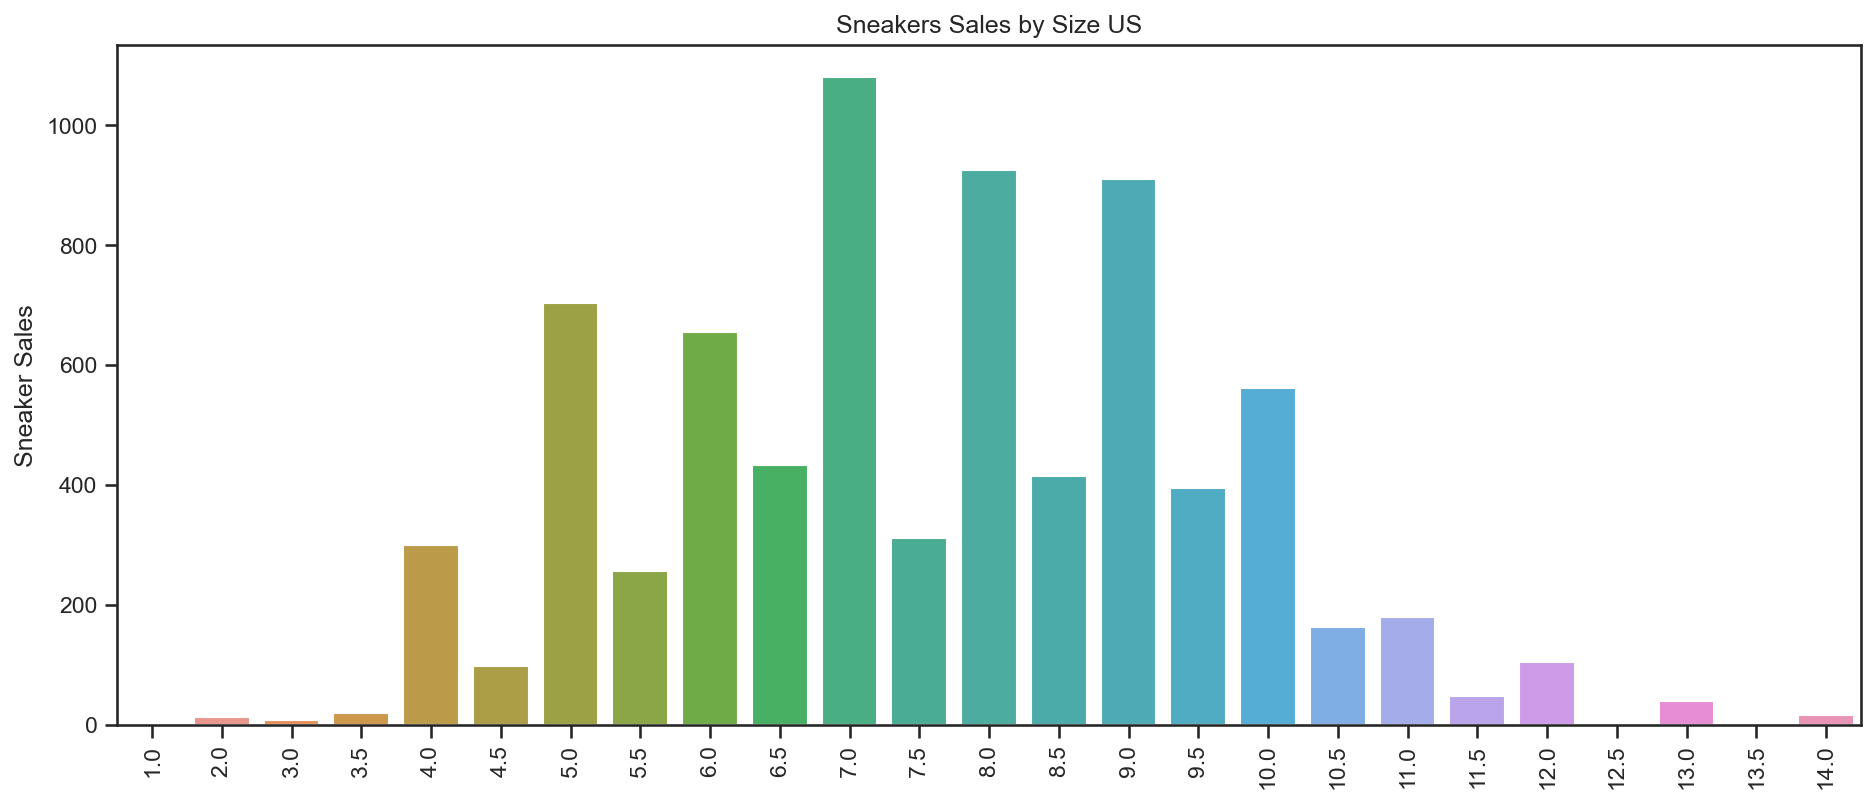

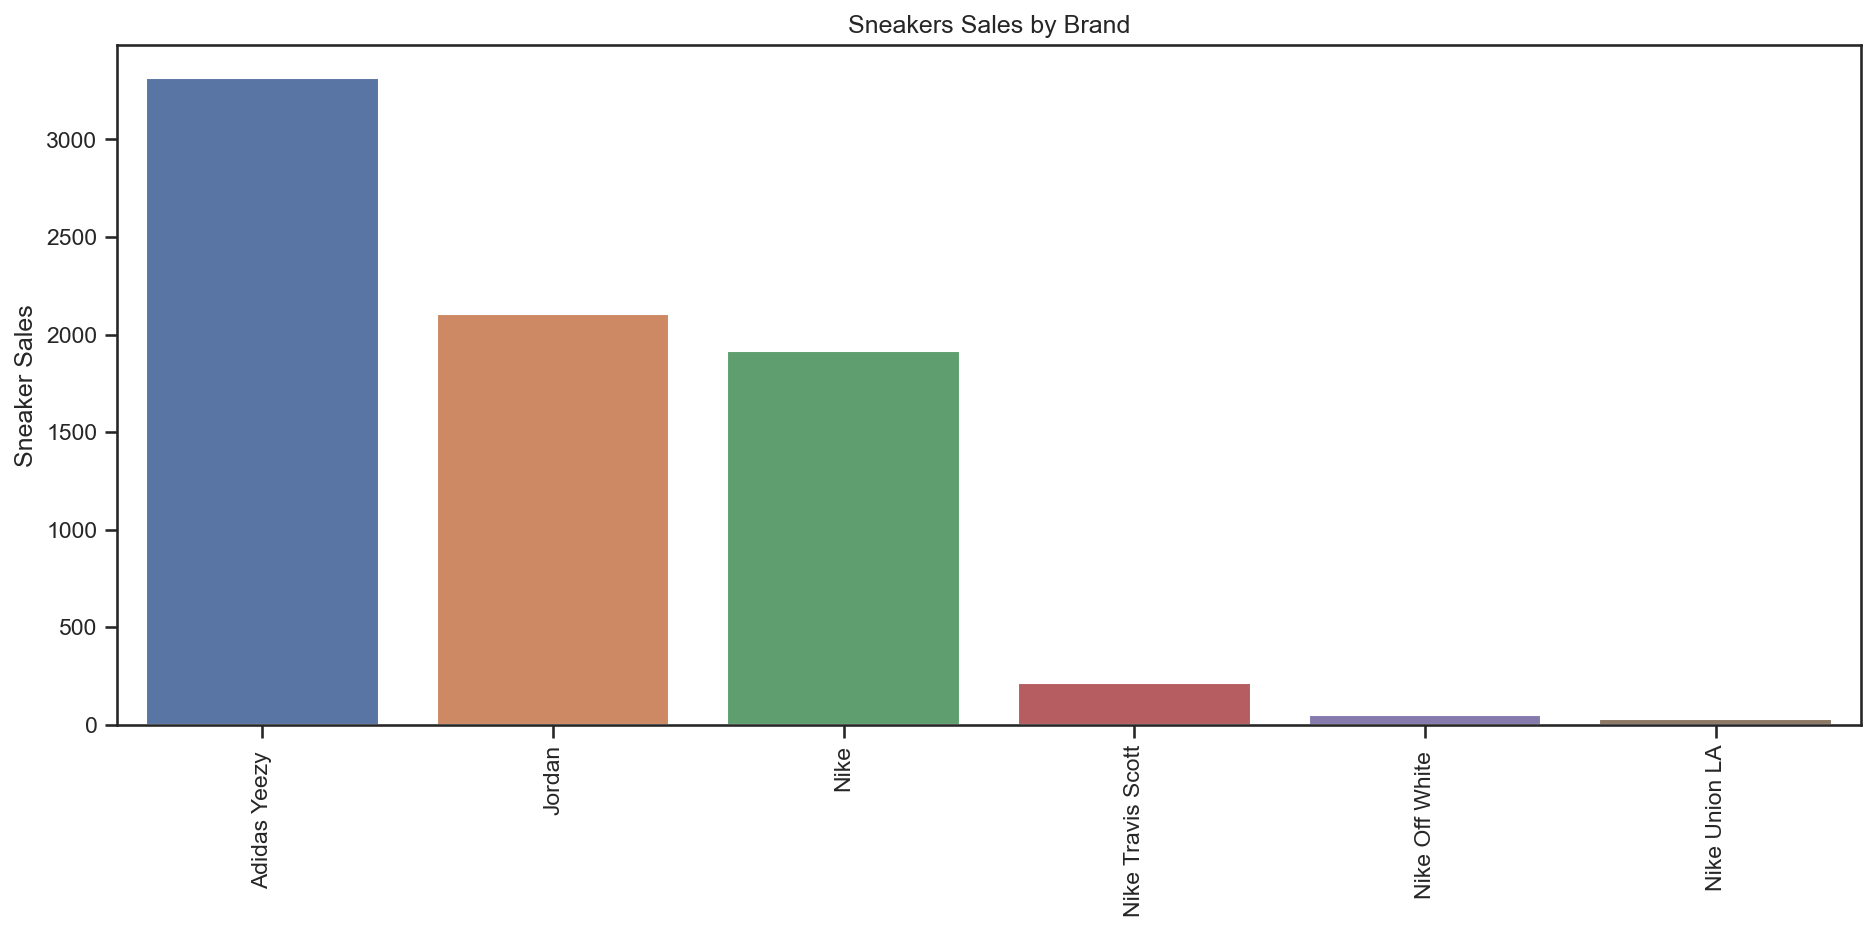

In [11]:
# A combine visualizations on variables in the Dataframe
df_mix = ['Retail Price', 'Size US','Brand' ]
for mix in df_mix:
    mix_num = df[str(mix)].value_counts()
    plt.figure(figsize=(15,6))
    chart = sns.barplot(x = mix_num.index, y= mix_num)
    chart.set_title("Sneakers Sales by %s" % (mix))
    plt.ylabel("Sneaker Sales")
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    plt.show(15)

In [12]:
df['Sneaker Name'].value_counts()[:20].index.tolist()

['Adidas Yeezy Slide Pure (First Release)',
 'Adidas Yeezy Slide Resin',
 'Jordan 5 Retro Raging Bull Red (2021)',
 'Nike Air Force 1 Low LX UV Reactive (W)',
 'adidas Yeezy Slide Pure (First Release)',
 'Jordan 6 Retro Carmine 2021 (GS)',
 'Adidas Yeezy Boost 350 V2 Mono Cinder',
 'Jordan 6 Retro Travis Scott British Khaki',
 'adidas Yeezy Boost 350 V2 Mono Cinder',
 'adidas Yeezy Slide Resin',
 'Nike Dunk Low SE Easter Candy (W)',
 'Jordan 1 Retro High Hyper Royal Smoke Grey',
 'Nike Dunk Low Green Glow (W)',
 'adidas Yeezy Slide Enflame Orange',
 'Nike Dunk Low UNC',
 'Jordan 1 Mid Banned (2020)',
 'Adidas Yeezy Slide Enflame Orange',
 'Nike Dunk Low UNC (2021)',
 'adidas Yeezy Foam RNNR Sand',
 'Nike Dunk Low Michigan (2021)']

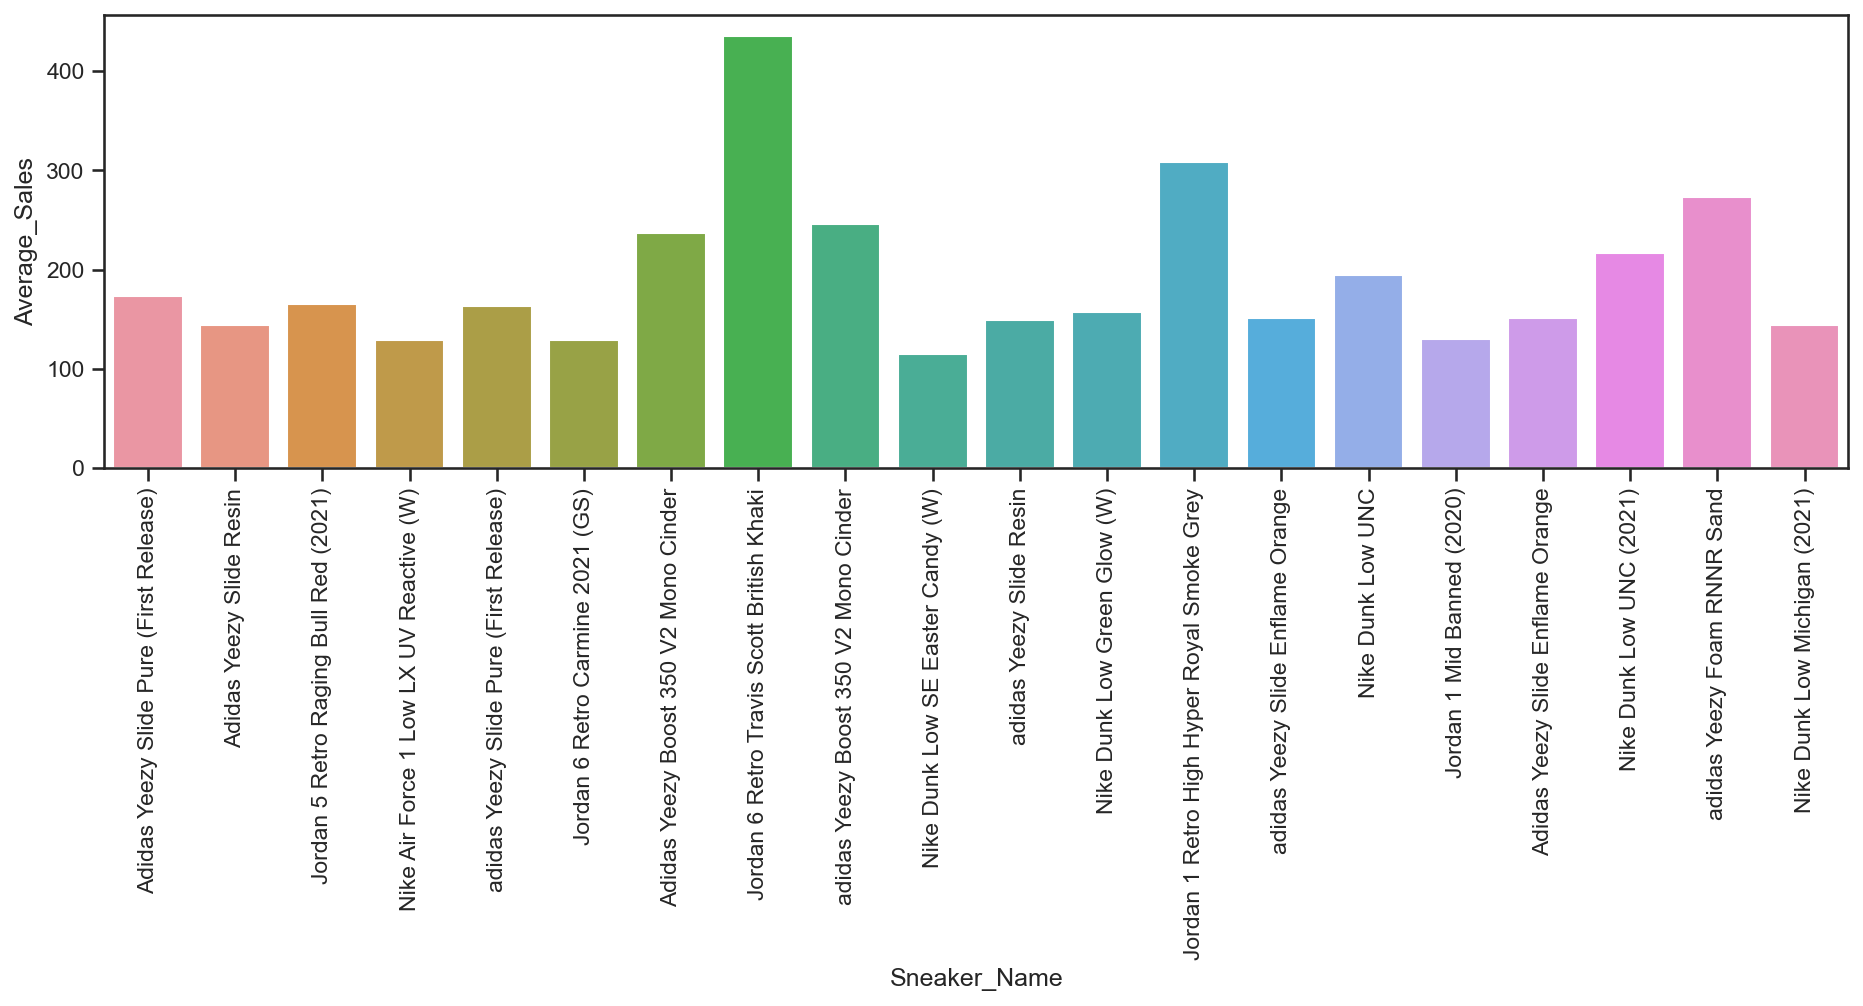

In [13]:
# Analyze trend between Sneaker Name & Sale price
# Create average retail price df
snkr = df[['Sneaker Name', 'Sales Price USD']]

# Clean up this list
sneakernames = ['Adidas Yeezy Slide Pure (First Release)',
 'Adidas Yeezy Slide Resin',
 'Jordan 5 Retro Raging Bull Red (2021)',
 'Nike Air Force 1 Low LX UV Reactive (W)',
 'adidas Yeezy Slide Pure (First Release)',
 'Jordan 6 Retro Carmine 2021 (GS)',
 'Adidas Yeezy Boost 350 V2 Mono Cinder',
 'Jordan 6 Retro Travis Scott British Khaki',
 'adidas Yeezy Boost 350 V2 Mono Cinder',
 'Nike Dunk Low SE Easter Candy (W)',
 'adidas Yeezy Slide Resin',
 'Nike Dunk Low Green Glow (W)',
 'Jordan 1 Retro High Hyper Royal Smoke Grey',
 'adidas Yeezy Slide Enflame Orange',
 'Nike Dunk Low UNC',
 'Jordan 1 Mid Banned (2020)',
 'Adidas Yeezy Slide Enflame Orange',
 'Nike Dunk Low UNC (2021)',
 'adidas Yeezy Foam RNNR Sand',
 'Nike Dunk Low Michigan (2021)']


avgs = []
for name in sneakernames:
    shoerow = snkr.loc[snkr['Sneaker Name'] == name]
    avgs.append(shoerow.mean()[0])
AvgPrice = pd.Series(avgs)
SneakerName = pd.Series(sneakernames)
avgprice_df = pd.DataFrame(columns = ['Sneaker_Name', 'Average_Sales'])
avgprice_df['Sneaker_Name'] = SneakerName
avgprice_df['Average_Sales'] = AvgPrice

# Creating visual of average shoe price
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x = avgprice_df['Sneaker_Name'] , y= avgprice_df['Average_Sales'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

In [14]:
# Find average sale price by brand
avgs_2 = []
bds = df[['Brand','Sales Price USD']]
brands = ['Nike Off-White ','Adidas Yeezy ','Jordan','Nike','Nike Travis Scott','Nike Union LA']
for brand in brands:
    brandrow = bds.loc[bds['Brand'] == str(brand)]
    avgs_2.append(brandrow['Sales Price USD'].mean())
print('Nike Off-White average price: $' + str(avgs_2[0]))
print('Adidas Yeezy average price: $' + str(avgs_2[1]))
print('Jordan average price: $' + str(avgs_2[2]))
print('Nike average price: $' + str(avgs_2[3]))
print('Nike Travis Scott average price: $' + str(avgs_2[4]))
print('Nike Union LA average price: $' + str(avgs_2[5]))

Nike Off-White average price: $nan
Adidas Yeezy average price: $182.4051296743073
Jordan average price: $191.38106413301665
Nike average price: $156.03800312825888
Nike Travis Scott average price: $435.36737327188973
Nike Union LA average price: $476.1065625000001


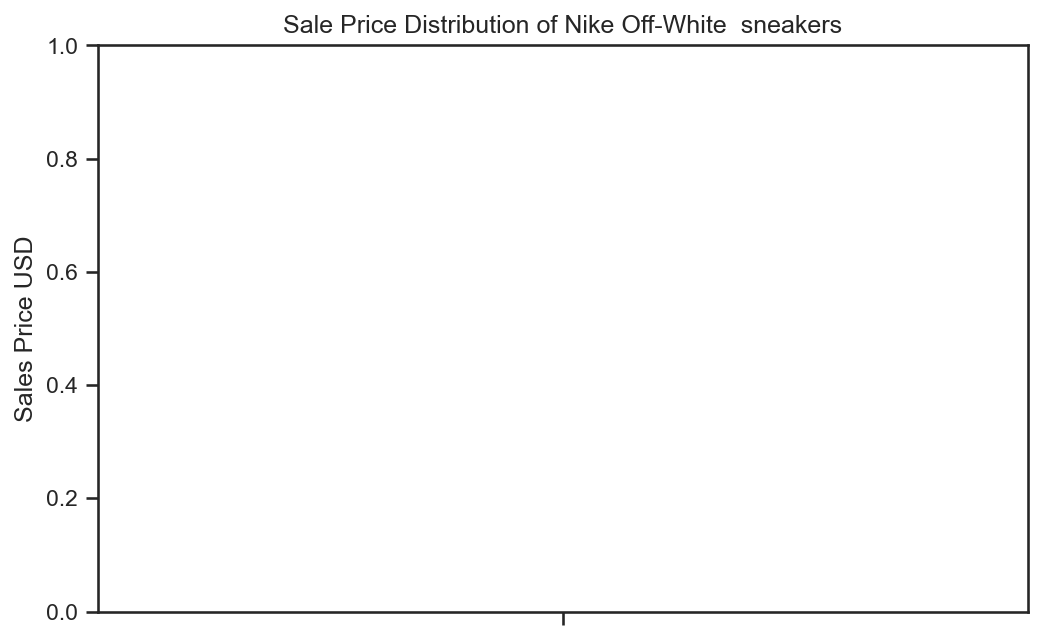

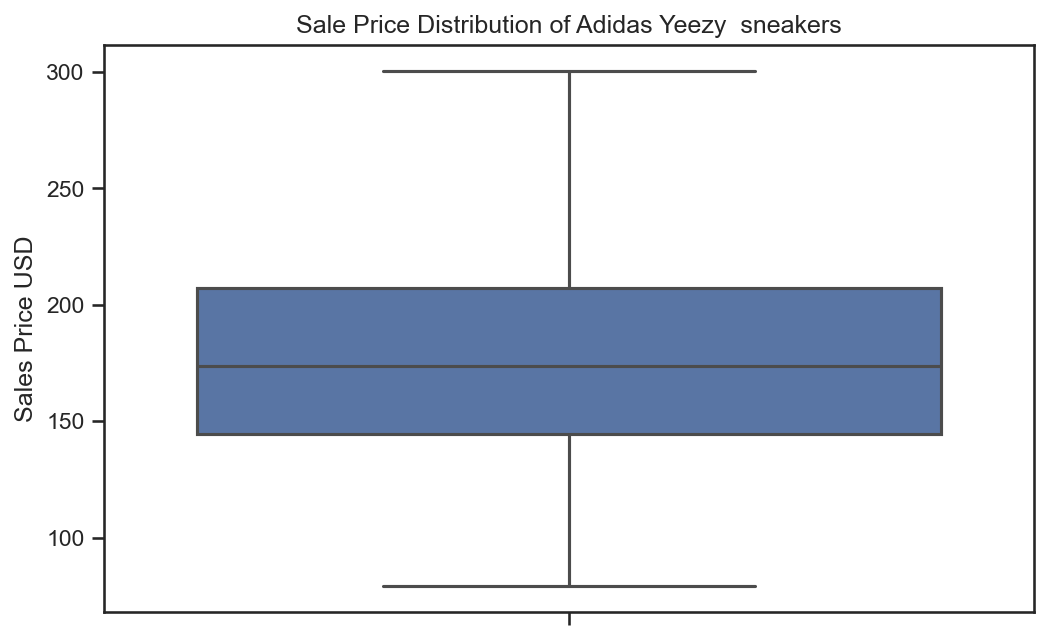

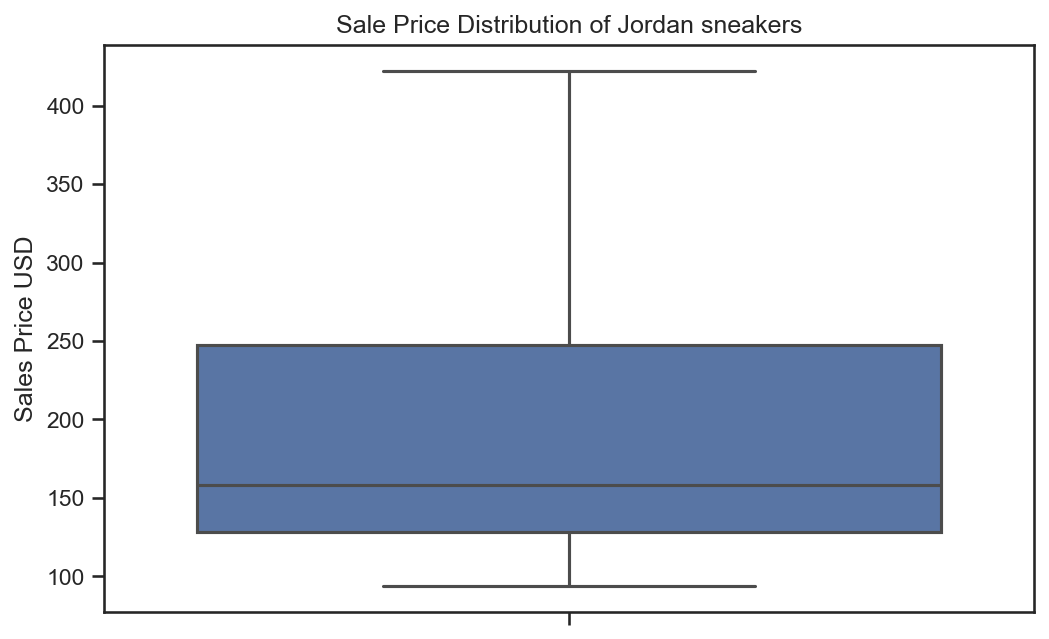

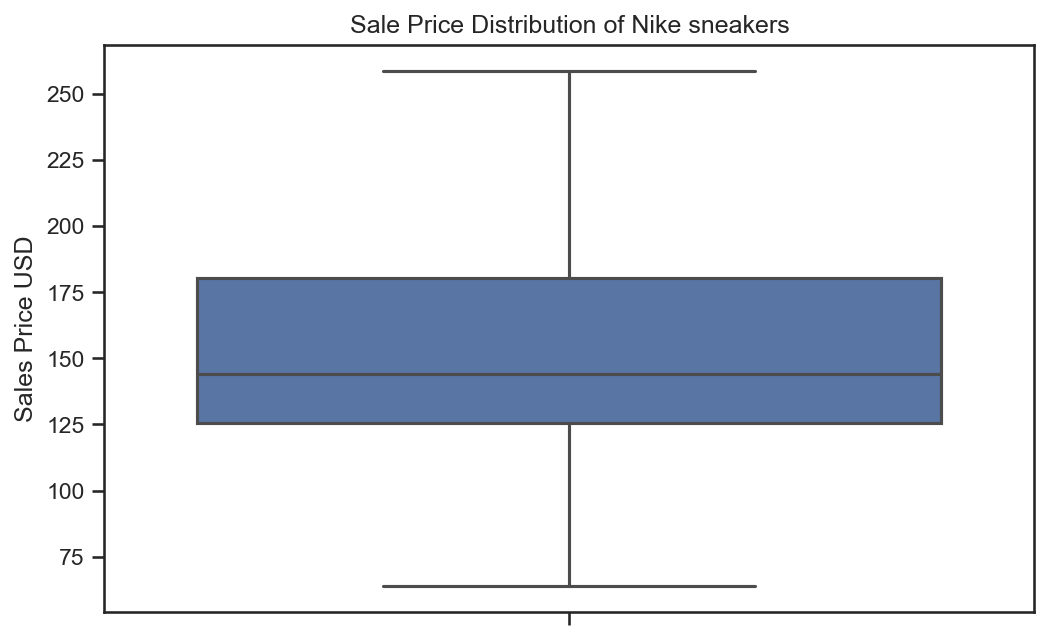

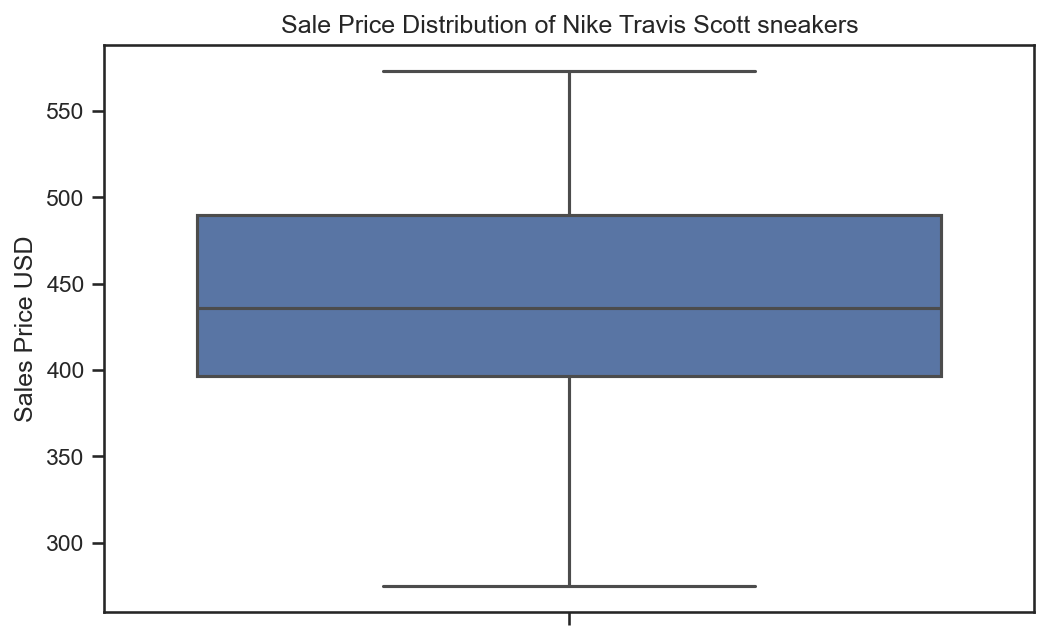

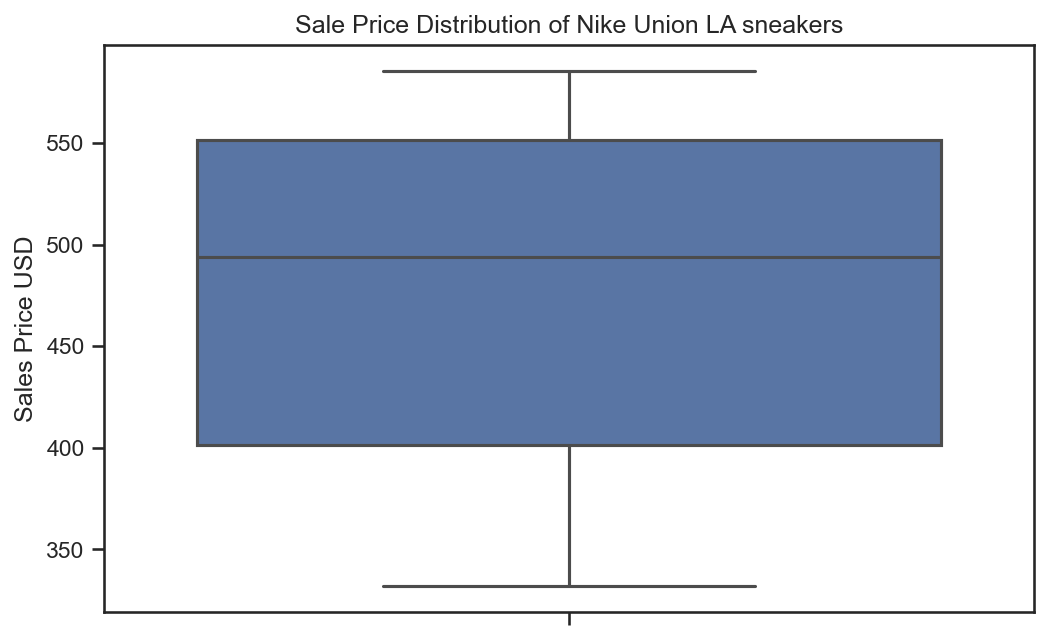

In [15]:
# Create boxplot distribution of sales price by brand
for brand in brands:
    brandrow = bds.loc[bds['Brand'] == str(brand)]
    chart = sns.boxplot(y=brandrow["Sales Price USD"], showfliers = False)
    chart.set_title("Sale Price Distribution of %s sneakers" % (brand))
    plt.show()

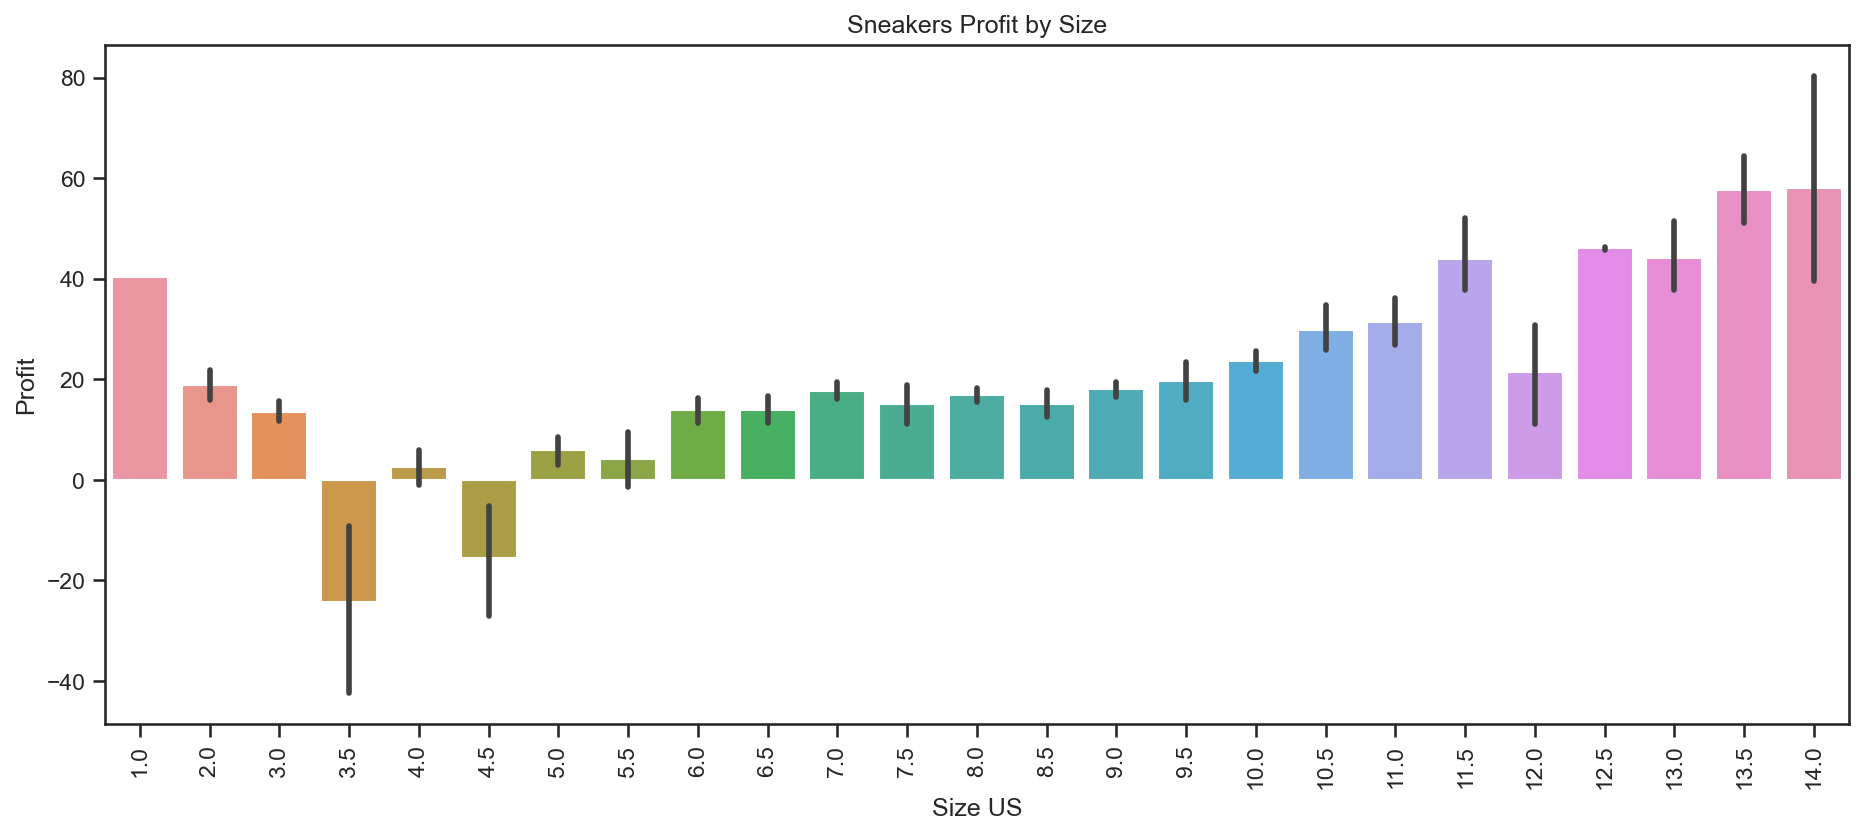

In [16]:
# Create barchart on Size and Profit 
plt.figure(figsize=(15,6))
chart1=sns.barplot(x = 'Size US', y= 'Profit USD', data = df)
chart1.set_title("Sneakers Profit by Size" )
plt.ylabel("Profit")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation = 90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.show(15)

In [17]:
import altair as alt

alt.data_transformers.disable_max_rows()

source = df

alt.Chart(df).mark_circle(size=60).encode(
    x='Size US',
    y='Profit USD',
    color='Brand',
    tooltip=['Brand','Sneaker Name',
             'Purchased Price USD']).interactive()

alt.Chart(...)

In [ ]:
# Renaming columns to get rid of spaces
df = df.rename(columns={
    "Sold Date": "Order_date",
    "Sneaker Name": "Sneaker_Name",
    "Sales Price USD": "Sale_Price",
    "Retail Price": "Retail_Price",
    "Purchased Price USD": "Purchased_Price",
    "Profit USD": "Profit",
    "Release Date": "Release_Date",
    "Size US": "Shoe_Size",
    })

In [ ]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('Profit ~ Purchased_Price', data=df).fit()

#view model summary
print(model.summary())

In [ ]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'Purchased_Price', fig=fig)

In [ ]:
#fit multiple linear regression model
model = ols('Profit ~ Purchased_Price + Shoe_Size', data=df).fit()

#view model summary
print(model.summary())

In [ ]:
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Shoe_Size', fig=fig)

In [ ]:
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Purchased_Price', fig=fig)

# Model 1

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [19]:
# Create features and target variables

features = ['Purchased_Price', 'Shoe_Size']
target = 'Profit'
X = df[features]
y = df[target]

In [20]:
# Get dummies varibles

X = pd.get_dummies(X)

In [21]:
# Split to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [22]:
sc = preprocessing.StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform (X_test)

In [23]:
# Linear Regression
regressor = LinearRegression()

regressor.fit(X_train_std, y_train)

LinearRegression()

In [24]:
# Regression score
regressor.score(X_test_std, y_test)

-4.4926751177755235e+23

In [25]:
# Actual and Predict price

y_pred = regressor.predict(X_test_std)

evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

Actual   Predicted
0  147.42  187.457664
1  179.10  148.625633
2  240.45  239.938133
3  221.44  237.016258
4  384.53  363.750633
5  378.20  331.500633
6  136.56  155.250633
7  313.94  256.406883
8  174.14  155.707664
9  182.53  177.625633

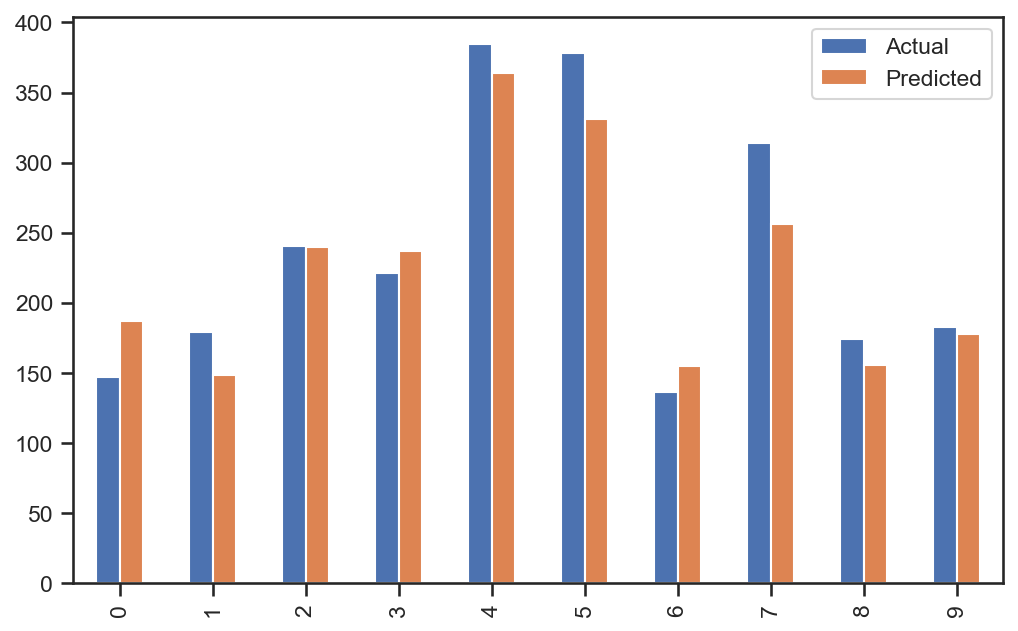

In [26]:
# Plot the data
evaluate.head(10).plot(kind = 'bar')
plt.show()

# Model 2

In [45]:
# Create features and target variables

features = ['Sale_Price','Shoe_Size']
target = 'Profit'

X = df[features]
y = df[target]

In [46]:
# Get dummies varibles
X = pd.get_dummies(X, columns=['Sale_Price', 'Shoe'])

In [47]:
X.head()

Sneaker Name_Adidas Yeezy 450 Cloud White  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Sneaker Name_Adidas Yeezy Boost 350 V2\nBlack Red (2017/2020)  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  0               
4                                                  0               

   Sneaker Name_Adidas Yeezy Boost 350 V2 Ash Stone  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Sneaker Name_Adidas Yeezy Boost 350 V2 Black Red (2017/2020)  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   Sneaker Name_Adidas Yeezy Boost 350 V2 Carbon  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Sneaker Name_Adidas Yeezy Boost 350 V2 Mono Cinder  \
0                                                  0    
1                                                  1    
2                                                  0    
3                                                  0    
4                                                  0    

   Sneaker Name_Adidas Yeezy Boost 350 V2 Mono Clay  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Sneaker Name_Adidas Yeezy Boost 700 MNVN  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Sneaker Name_Adidas Yeezy Foam RNNR MXT Moon Gray  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Sneaker Name_Adidas Yeezy Foam RNNR MXT Moon Grey  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Sneaker Name_Adidas Yeezy Foam RNNR Mineral Blue  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Sneaker Name_Adidas Yeezy Foam RNNR Mineral Blue (Kids)  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                               

In [48]:
# Split to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

sc = preprocessing.StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform (X_test)

regressor = LinearRegression()

regressor.fit(X_train_std, y_train)

LinearRegression()

In [49]:
# Linear regression score 
regressor.score(X_test_std, y_test)

-9.482237611893941e+24

In [50]:
# Actual vs. Predicted
y_pred = regressor.predict(X_test_std)

evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

Actual   Predicted
0  147.42  162.230502
1  179.10  150.293002
2  240.45  249.964877
3  221.44  243.589877
4  384.53  367.824252
5  378.20  344.777377
6  136.56  142.230502
7  313.94  270.964877
8  174.14  162.230502
9  182.53  173.793002

<AxesSubplot:>

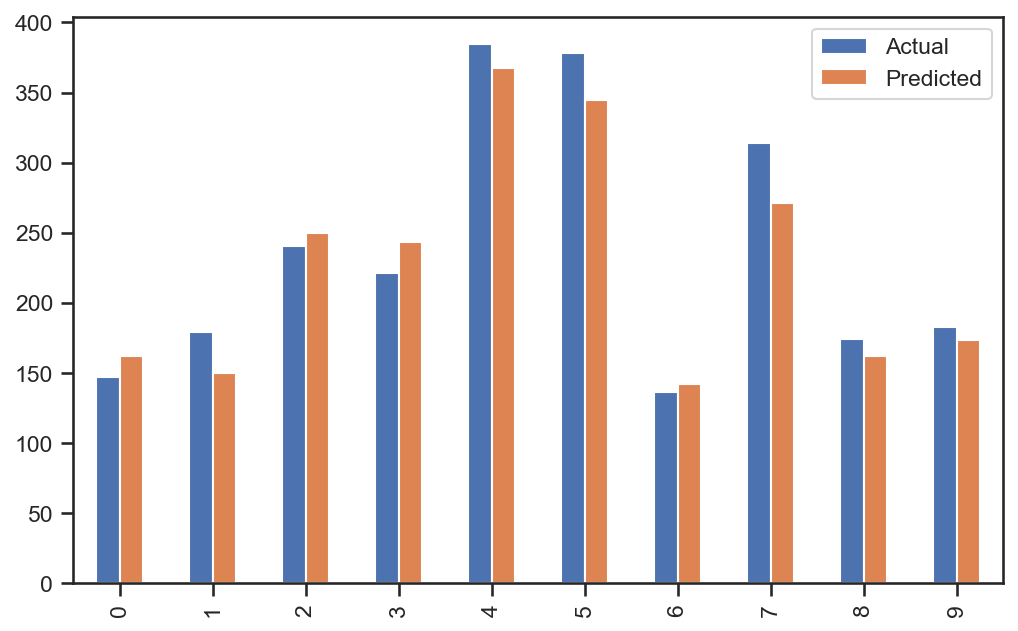

In [51]:
evaluate.head(10).plot(kind = 'bar')

In [52]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Absolute Error (MAE)
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: -9.482237611893941e+24
MAE score: 7477963019715.408
MSE score: 6.546844695155978e+28
